In [2]:
#importing data manupulation libraries
import pandas as pd
import numpy as np
#importing data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#importing warning
import warnings
warnings.filterwarnings("ignore")
#importing logging
import logging
logging.basicConfig(level=logging.INFO,
                    filename='model.log',force=True,
                    filemode='w',
                    format='%(asctime)s %(levelname)s %(message)s')
#importing scikit learn libraries   
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix                 

In [3]:
url='https://raw.githubusercontent.com/harshthorve284/Aus-Whether-Forecasting-/refs/heads/main/weatherAUS.csv'
df=pd.read_csv(url)
df.sample(frac=1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
98537,2014-10-24,Adelaide,14.0,33.1,0.0,3.8,NaN,SSW,30.0,NE,...,50.0,15.0,1015.1,1012.9,NaN,NaN,22.1,31.7,No,No
128122,2012-08-16,Walpole,8.9,14.0,NaN,NaN,NaN,WSW,28.0,WSW,...,70.0,67.0,1026.2,1024.9,NaN,NaN,12.2,13.3,NaN,NaN
125532,2013-12-04,SalmonGums,11.3,23.0,0.2,NaN,NaN,S,41.0,SSE,...,45.0,30.0,NaN,NaN,NaN,NaN,17.4,21.9,No,No
132233,2015-04-20,Hobart,3.4,16.3,0.0,4.0,7.7,NNW,26.0,NNW,...,64.0,46.0,1036.5,1033.6,1.0,5.0,8.4,14.7,No,No
103399,2011-05-27,Nuriootpa,9.6,12.6,0.6,1.0,0.7,WNW,22.0,NaN,...,94.0,83.0,1025.5,1023.9,8.0,8.0,10.3,12.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51320,2015-06-15,Tuggeranong,1.2,15.5,0.0,NaN,NaN,NE,26.0,NW,...,94.0,64.0,1029.8,1026.2,NaN,NaN,7.1,14.4,No,Yes
47751,2014-01-01,Canberra,10.1,26.9,0.0,NaN,NaN,NW,35.0,N,...,70.0,27.0,1012.5,1010.9,NaN,5.0,17.4,25.0,No,No
38079,2013-06-28,WaggaWagga,6.7,15.7,0.0,0.6,2.2,ESE,20.0,E,...,76.0,65.0,1024.2,1022.3,7.0,7.0,10.1,15.1,No,No
57626,2016-01-27,Ballarat,15.6,25.2,0.0,NaN,NaN,NNE,57.0,NNE,...,73.0,67.0,1010.5,1008.7,8.0,8.0,21.2,22.4,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
#checking null values per column
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [6]:
#Calculate % of missing values per column
null_percent=(df.isnull().sum()/len(df))*100

#Droping the columns with more than 15%  missing value
col_to_drop = null_percent[null_percent> 15].index

#Drop those columns from the dataframe
df_cleaned = df.drop(columns=col_to_drop,inplace=True)



In [7]:
# converting the datecolumn
df['Date']=pd.to_datetime(df['Date'])
df.drop(columns=['Date'],inplace=True)

In [8]:
df['AvgTemp'] = (df['MinTemp'] + df['MaxTemp']) / 2


In [9]:
df.drop(['MinTemp', 'MaxTemp'], axis=1, inplace=True)

In [10]:
#draging the target column at the end of the Dataframe
target_col = 'RainTomorrow'
cols = [col for col in df.columns 
        if col != target_col] + [target_col]
df = df[cols]


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   Rainfall       142199 non-null  float64
 2   WindGustDir    135134 non-null  object 
 3   WindGustSpeed  135197 non-null  float64
 4   WindDir9am     134894 non-null  object 
 5   WindDir3pm     141232 non-null  object 
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Temp9am        143693 non-null  float64
 13  Temp3pm        141851 non-null  float64
 14  RainToday      142199 non-null  object 
 15  AvgTemp        143579 non-null  float64
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(11), object(6)
mem

In [12]:
categorical_col=df.select_dtypes(include='object')
numerical_col=df.select_dtypes(exclude='object')

In [13]:
#Discriptive stats
from collections import OrderedDict
stats=[]

for i in numerical_col.columns:
    numerical_stats=OrderedDict({
    'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var()
    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)
report    

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance
0,Rainfall,2.360918,0.00,0.0,0.0,0.8,0.8,8.478060,9.836225,178.152079,371.0,0.00,71.877497
1,WindGustSpeed,40.035230,39.00,35.0,31.0,48.0,17.0,13.607062,0.874879,1.418642,135.0,6.00,185.152144
2,WindSpeed9am,14.043426,13.00,9.0,7.0,19.0,12.0,8.915375,0.777630,1.226991,130.0,0.00,79.483917
3,WindSpeed3pm,18.662657,19.00,13.0,13.0,24.0,11.0,8.809800,0.628215,0.763858,87.0,0.00,77.612576
4,Humidity9am,68.880831,70.00,99.0,57.0,83.0,26.0,19.029164,-0.483969,-0.037555,100.0,0.00,362.109100
5,Humidity3pm,51.539116,52.00,52.0,37.0,66.0,29.0,20.795902,0.033614,-0.511363,100.0,0.00,432.469526
6,Pressure9am,1017.649940,1017.60,1016.4,1012.9,1022.4,9.5,7.106530,-0.095524,0.231563,1041.0,980.50,50.502773
7,Pressure3pm,1015.255889,1015.20,1015.3,1010.4,1020.0,9.6,7.037414,-0.045621,0.129172,1039.6,977.10,49.525193
8,Temp9am,16.990631,16.70,17.0,12.3,21.6,9.3,6.488753,0.088540,-0.340523,40.2,-7.20,42.103917
9,Temp3pm,21.683390,21.10,20.0,16.6,26.4,9.8,6.936650,0.237960,-0.136281,46.7,-5.40,48.117120


In [14]:
from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [15]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   Rainfall       145460 non-null  float64
 2   WindGustDir    145460 non-null  object 
 3   WindGustSpeed  145460 non-null  float64
 4   WindDir9am     145460 non-null  object 
 5   WindDir3pm     145460 non-null  object 
 6   WindSpeed9am   145460 non-null  float64
 7   WindSpeed3pm   145460 non-null  float64
 8   Humidity9am    145460 non-null  float64
 9   Humidity3pm    145460 non-null  float64
 10  Pressure9am    145460 non-null  float64
 11  Pressure3pm    145460 non-null  float64
 12  Temp9am        145460 non-null  float64
 13  Temp3pm        145460 non-null  float64
 14  RainToday      145460 non-null  object 
 15  AvgTemp        145460 non-null  float64
 16  RainTomorrow   145460 non-null  object 
dtypes: float64(11), object(6)
mem

In [17]:

from sklearn.preprocessing import LabelEncoder

for i in categorical_col:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

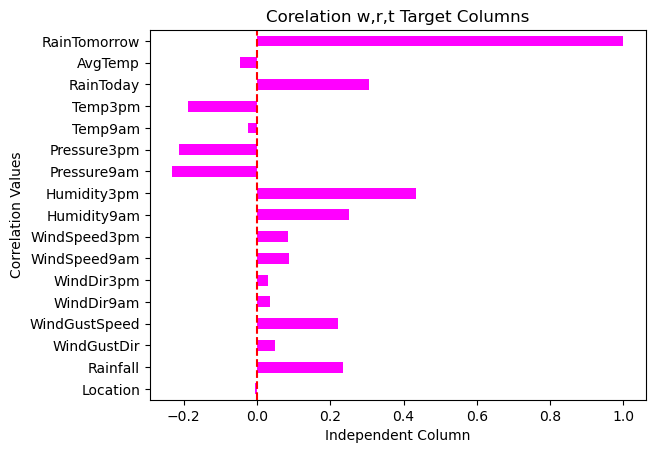

In [18]:
df.corr()['RainTomorrow'].plot(kind ='barh',cmap= 'spring')
plt.axvline(0,linestyle = '--' ,color = 'red')
plt.title('Corelation w,r,t Target Columns')
plt.ylabel('Correlation Values')
plt.xlabel('Independent Column')
plt.show()

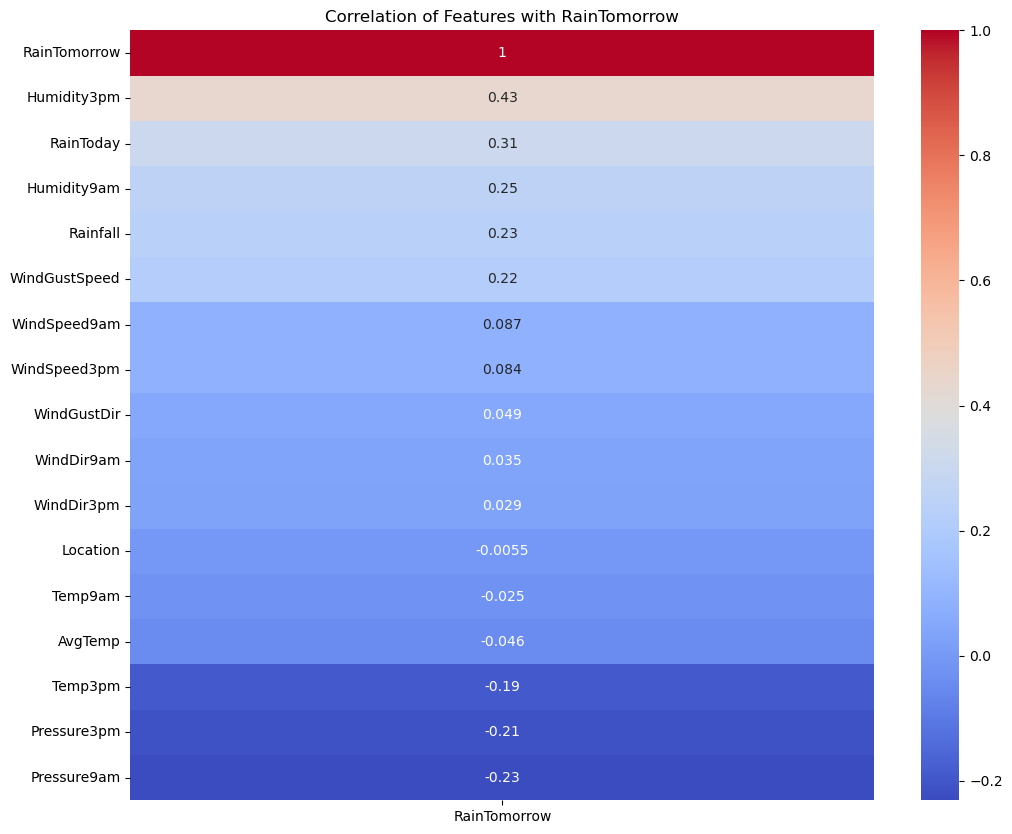

In [19]:
# Calculate correlation 
corr_matrix = df.corr(numeric_only=True)


# Sort correlation of all features with the target column
target = 'RainTomorrow'
sorted_corr = corr_matrix[target].sort_values(ascending=False)

# Plot the top correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with RainTomorrow")
plt.show()

In [20]:
X=df.drop(columns=['RainTomorrow','WindDir3pm',
    'WindDir9am',
    'WindGustDir',
   
    'WindSpeed9am',
    'WindSpeed3pm'],axis=1)

y=df['RainTomorrow']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [22]:
from imblearn.over_sampling import SMOTE,SMOTEN,ADASYN
os=SMOTE(random_state=42)
X_train,y_train=os.fit_resample(X_train,y_train)
y_train.value_counts()


RainTomorrow
0    79596
1    79596
Name: count, dtype: int64

In [23]:
sc=MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier().fit(X_train,y_train)
y_pred_RF=RF.predict(X_test)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_RF)*100)


The model accuracy for this model: 83.79623264127595


In [25]:
from catboost import CatBoostClassifier
CB=CatBoostClassifier().fit(X_train,y_train)
y_pred_CB=CB.predict(X_test)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_CB)*100)

Learning rate set to 0.089775
0:	learn: 0.6522815	total: 461ms	remaining: 7m 40s
1:	learn: 0.6199869	total: 595ms	remaining: 4m 56s
2:	learn: 0.5929915	total: 664ms	remaining: 3m 40s
3:	learn: 0.5708096	total: 756ms	remaining: 3m 8s
4:	learn: 0.5526259	total: 827ms	remaining: 2m 44s
5:	learn: 0.5363521	total: 933ms	remaining: 2m 34s
6:	learn: 0.5226850	total: 1.03s	remaining: 2m 26s
7:	learn: 0.5114449	total: 1.14s	remaining: 2m 21s
8:	learn: 0.4970690	total: 1.21s	remaining: 2m 13s
9:	learn: 0.4889965	total: 1.32s	remaining: 2m 11s
10:	learn: 0.4819814	total: 1.4s	remaining: 2m 6s
11:	learn: 0.4747456	total: 1.48s	remaining: 2m 1s
12:	learn: 0.4703871	total: 1.54s	remaining: 1m 57s
13:	learn: 0.4652525	total: 1.62s	remaining: 1m 54s
14:	learn: 0.4601486	total: 1.7s	remaining: 1m 51s
15:	learn: 0.4538606	total: 1.8s	remaining: 1m 50s
16:	learn: 0.4491340	total: 1.87s	remaining: 1m 48s
17:	learn: 0.4451340	total: 1.99s	remaining: 1m 48s
18:	learn: 0.4430066	total: 2.07s	remaining: 1m 46

In [27]:

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression().fit(X_train,y_train)
y_pred_LR=LR.predict(X_train)
print('The model accuracy for this model:',accuracy_score(y_test,y_pred_CB)*100)



The model accuracy for this model: 85.30180118245566
